# Yandex.Afisha: Optimization of marketing expenses

The analysis below is done for Yandex.Afisha. Yandex.Afisha is an app that helps users find out about events like movies viewings, exhibitions, gigs, etc. and buy tickets. The objective of the analysis is to help the marketing experts from Yandex.Afisha make effective investment in marketing. 

# Table of Contents 

- [Dataset Description](#description) <br>
- [Dataset inspection](#inspect) <br>
- [Fixing Datasets](#fixingdatasets) <br>
    - [Fixing Column Names](#fixcolname) <br>
    - [Fixing Column Data Types](#fixcoldata) <br>
- [Reporting and Metric Calculation](#rep) <br>
    - [Product](#prod)<br>
    - [Sales](#sales)<br>
    - [Marketing](#market)<br>
    - [Device Plots](#device) <br>
- [Conclusion](#conclusion)<br>

In [1]:
#importing used libraries 
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Dataset Description <br>
<div id='description'></div>

- uid: user's unique idntifier <br>
- device: user's device <br>
- start_ts: session start date and time <br>
- end_ts: session end date and time <br>
- source_id: identifier of the ad source the user came from <br> 
- buy_ts: order date and time <br>
- revenue: Yandex.Afisha's revenue from the order <br>
- source_id: ad source identifier <br>
- dt: date <br>
- costs: expenses on this ad source on this day <br>

In [2]:
#imprting data 
try:
    dfvisits = pd.read_csv('C:/Users/Wandile/Documents/PracticumProjects/BusinessAnalytics/visits_log_us.csv')
    dforders = pd.read_csv('C:/Users/Wandile/Documents/PracticumProjects/BusinessAnalytics/orders_log_us.csv')
    dfcosts = pd.read_csv('C:/Users/Wandile/Documents/PracticumProjects/BusinessAnalytics/costs_us.csv')
except:
    dfvisits = pd.read_csv('/datasets/visits_log_us.csv')
    dforders = pd.read_csv('/datasets/orders_log_us.csv')
    dfcosts = pd.read_csv('/datasets/costs_us.csv')

## Dataset Inspection <br>
<div id='inspect'></div>

In [3]:
#Viewing visits table
dfvisits.info()
print(f'Missing values in visits table {dfvisits.isna().sum()}')
print(f'Duplicated values in visits table {dfvisits.duplicated().sum()}')
dfvisits.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
Missing values in visits table Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64
Duplicated values in visits table 0


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [4]:
#Viewing orders table
dforders.info()
print(f'Missing values in orders table{dforders.isna().sum()}')
print(f'Duplicated values in orders table {dforders.duplicated().sum()}')
dforders.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
Missing values in orders tableBuy Ts     0
Revenue    0
Uid        0
dtype: int64
Duplicated values in orders table 0


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [5]:
#Viewing costs table 
dfcosts.info()
print(f'Missing values in costs table{dfcosts.isna().sum()}')
print(f'Duplicated values in costs table {dfcosts.duplicated().sum()}')
dfcosts.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
Missing values in costs tablesource_id    0
dt           0
costs        0
dtype: int64
Duplicated values in costs table 0


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


Comment: 

- All the column names for visits and orders table are incorrect and must be changed to snake_case format.- <br>
- The End Ts and Start Ts column data type must be changed from string to datetimetype. <br>
- The Buy Ts column data type must be changed from string to datetime type. <br>
- There are no missing values in all three tables.
- There are no duplicated values in all three tables.

## Fixing Datasets <br>
<div id='fixingdatasets'></div>

### Fixing Column Names <br>
<div id='fixcolname'></div>

In [6]:
#Fixing visits table column namess
dfvisits = dfvisits.rename(columns={'Uid':'uid','Device':'device','Start Ts':'start_ts','End Ts':'end_ts','Source Id':'source_id'})
dfvisits

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


In [7]:
#Fixing orders table column names
dforders = dforders.rename(columns={'Uid':'uid','Buy Ts':'buy_ts','Revenue':'revenue'})
dforders

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


Comment:
- In this section above the column names were changed to snake_case.

### Fixing Column Data Types <br>
<div id='fixcoldata'></div>

In [8]:
#Changing data types for visits table 
dfvisits['end_ts'] = pd.to_datetime(dfvisits['end_ts'],format="%Y-%m-%d %H:%M")
dfvisits['start_ts'] = pd.to_datetime(dfvisits['start_ts'],format="%Y-%m-%d %H:%M")
dfvisits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [9]:
#Changing data types for orders table 
dforders['buy_ts'] = pd.to_datetime(dforders['buy_ts'],format="%Y-%m-%d %H:%M")
dforders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [10]:
#Changing data types for costs table
dfcosts['dt'] = pd.to_datetime(dfcosts['dt'],format="%Y-%m-%d")
dfcosts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


Comment:
- In this section the date columns from the dataframe were changed from string type to datetime data type.

### Checking if dates are within time range

In [11]:
dfvisits['end_ts'].min()

Timestamp('2017-06-01 00:02:00')

In [12]:
dfvisits['end_ts'].max()

Timestamp('2018-06-01 01:26:00')

In [13]:
dfvisits = dfvisits[dfvisits['end_ts'] <= '2018-05-31 23:59:59']

In [14]:
dfvisits['end_ts'].max()

Timestamp('2018-05-31 23:59:00')

Comment: Above the end_ts column from the visits dataframe was checked if it ends on the required timeline. The dates in this column ended on the first of June and were corrected to end on the 31st of May.

In [15]:
dfvisits['start_ts'].min()

Timestamp('2017-06-01 00:01:00')

In [16]:
dfvisits['start_ts'].max()

Timestamp('2018-05-31 23:59:00')

Comment: Above the start_ts column from the visits dataframe starts and ends on the required time interval.

In [17]:
dforders['buy_ts'].min()

Timestamp('2017-06-01 00:10:00')

In [18]:
dforders['buy_ts'].max()

Timestamp('2018-06-01 00:02:00')

In [19]:
dforders = dforders[dforders['buy_ts'] <= '2018-05-31 23:59:59']

In [20]:
dforders['buy_ts'].max()

Timestamp('2018-05-31 23:56:00')

Comment: Above the buy_ts column from the orders dataframe was checked if it ends on the required timeline. The dates in this column ended on the first of June and were corrected to end on the 31st of May.

In [21]:
dfcosts['dt'].min()

Timestamp('2017-06-01 00:00:00')

In [22]:
dfcosts['dt'].max()

Timestamp('2018-05-31 00:00:00')

Comment: Above the dt column from the costs dataframe starts and ends on the required time interval.

## Reporting and Metric Calculation <br>
<div id='rep'></div>

### Product <br>
<div id='prod'></div>

In [23]:
#Creating columns for year, month, week and day 
dfvisits = dfvisits.copy()
dfvisits.loc[:,'session_month'] = dfvisits['start_ts'].astype('datetime64[M]')
dfvisits.loc[:,'session_week'] = dfvisits['start_ts'].astype('datetime64[W]')
dfvisits.loc[:,'session_date'] = pd.to_datetime(dfvisits['start_ts'].dt.date)
print(dfvisits.head())

    device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid session_month session_week session_date  
0  16879256277535980062    2017-12-01   2017-12-14   2017-12-20  
1    104060357244891740    2018-02-01   2018-02-15   2018-02-19  
2   7459035603376831527    2017-07-01   2017-06-29   2017-07-01  
3  16174680259334210214    2018-05-01   2018-05-17   2018-05-20  
4   9969694820036681168    2017-12-01   2017-12-21   2017-12-27  


In [24]:
#Calculating the day, week and month metrics
dau = dfvisits.groupby('session_date').agg({'uid':'nunique'})
wau = dfvisits.groupby('session_week').agg({'uid':'nunique'})
mau = dfvisits.groupby('session_month').agg({'uid':'nunique'})

print(f'Average number of daily users: {dau.mean()}.')
print(f'Average number of weekly users: {wau.mean()}.')
print(f'Average number of monthly users: {mau.mean()}.')

Average number of daily users: uid    907.967033
dtype: float64.
Average number of weekly users: uid    5724.245283
dtype: float64.
Average number of monthly users: uid    23227.833333
dtype: float64.


#### How many people use it every day, week and month?

- There are 907 daily users. <br>
- There are 5 724 weekly users. <br>
- There are 23 227 monthly users.

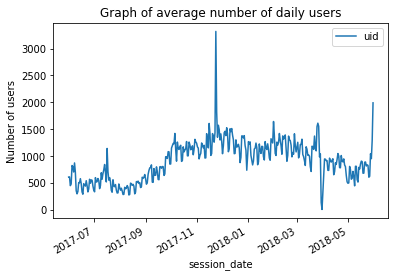

In [25]:
dau.plot()
plt.title('Graph of average number of daily users')
plt.ylabel('Number of users')
plt.show()

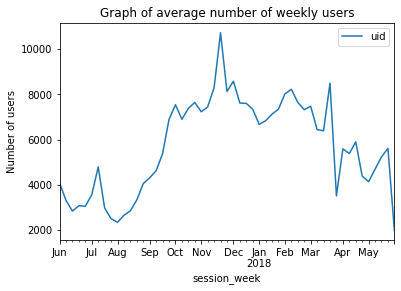

In [26]:
wau.plot()
plt.title('Graph of average number of weekly users')
plt.ylabel('Number of users')
plt.show()

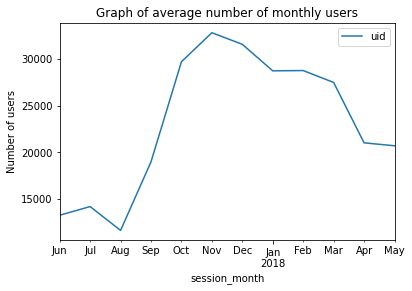

In [27]:
mau.plot()
plt.title('Graph of average number of monthly users')
plt.ylabel('Number of users')
plt.show()

In [28]:
#Calculating number of sessions per day
sessions_per_user= dfvisits.groupby('session_date').agg({'uid':['count','nunique']})
sessions_per_user.columns = ['n_sessions','n_users']
sessions_per_user['n_session_users'] = sessions_per_user['n_sessions']/sessions_per_user['n_users']
average_sessions_per_day = sessions_per_user['n_session_users'].mean()
print(f'The average number of sessions per day is: {int(average_sessions_per_day)}.')

The average number of sessions per day is: 1.


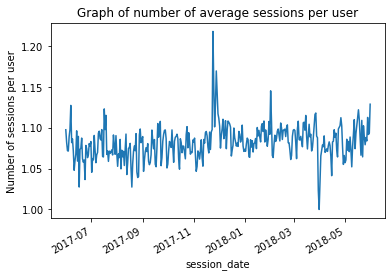

In [29]:
sessions_per_user['n_session_users'].plot()
plt.title('Graph of number of average sessions per user')
plt.ylabel('Number of sessions per user')
plt.show()

#### How many sessions are there per day per user? 

- A user has on average one session per day however a user can have more than one session in a day.

In [30]:
#Calculating average session length
dfvisits['session_duration_min'] = (dfvisits['end_ts']-dfvisits['start_ts']).dt.total_seconds()/60
print(f'The average session length of each session is: {dfvisits["session_duration_min"].mean()} minutes.')
print(f'The median session length of each session is: {dfvisits["session_duration_min"].median()} minutes.')

The average session length of each session is: 10.716414756938647 minutes.
The median session length of each session is: 5.0 minutes.


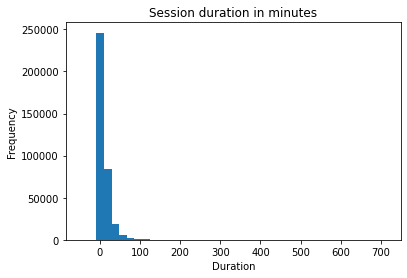

In [31]:
plt.hist(dfvisits['session_duration_min'], bins=40)
plt.title('Session duration in minutes')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

#### What is the length of each session?

- The median duration of a session is 5 minutes and the mean is double the time of one session which implies the mean duration of a session is 10 minutes. 

In [32]:
# Calculate the first visit time of a user Wandile
first_visit = dfvisits.groupby("uid").agg(first_visit_ts=("start_ts", "min"))
# merge the first visit to the `dfvisits` dataframe
dfvisits = pd.merge(dfvisits, first_visit, on="uid")
# Calculate the first visits date, and first visit month from the first visit time
dfvisits["first_visit_date"] = dfvisits["first_visit_ts"].dt.date
dfvisits["first_visit_month"] = dfvisits["first_visit_ts"].astype("datetime64[M]")
dfvisits["first_visit_date"] = pd.to_datetime(dfvisits["first_visit_ts"].dt.date)
#Calculating visit month
dfvisits['visit_month'] = pd.to_datetime(dfvisits['session_date'],unit='d')-pd.to_timedelta(dfvisits['session_date'].dt.day-1,unit='d')
#Calculating first visit month
dfvisits['first_visit_month'] = pd.to_datetime(dfvisits['first_visit_date'],unit='d')-pd.to_timedelta(dfvisits['first_visit_date'].dt.day-1,unit='d')

In [33]:
#Calculating cohort lifetime
dfvisits['cohort_lifetime'] = dfvisits['visit_month']-dfvisits['first_visit_month']
#cohort_lifetime_months = np.timedelta64(1,'M').astype('timedelta64[M]')
dfvisits['cohort_lifetime'] = (dfvisits['cohort_lifetime']/np.timedelta64(1,'M')).round().astype('int')
dfvisits['cohort_lifetime'] = dfvisits['cohort_lifetime'].astype(int)

In [34]:
#Grouping data bt cohort and lifetime 
cohorts = dfvisits.groupby(['first_visit_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
#Finding initial number of users 
initial_users_count = cohorts[cohorts['cohort_lifetime']==0][['first_visit_month','uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})
#Merging initial users count table to cohorts table
cohorts = cohorts.merge(initial_users_count, on='first_visit_month')
#Calculating retention rate
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']

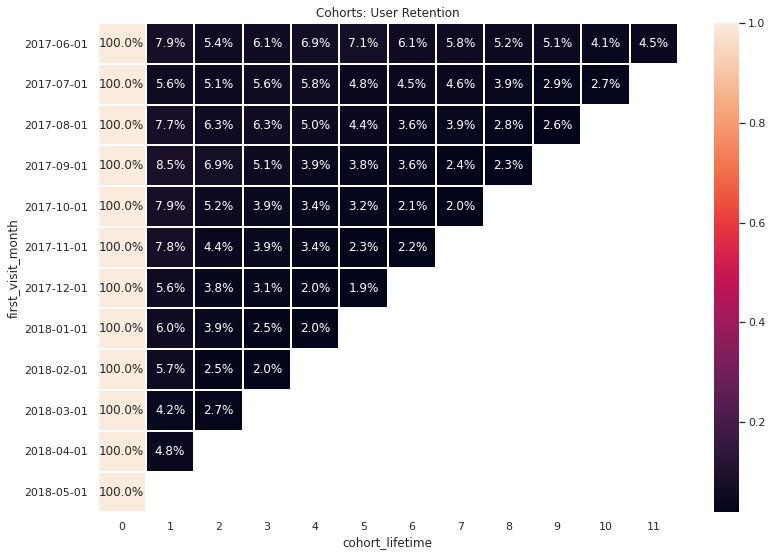

In [35]:
#Creating pivot table for retention rate
retention_pivot = cohorts.pivot_table(index=cohorts['first_visit_month'].dt.date,columns='cohort_lifetime',values='retention',aggfunc='sum')

#Creating retention heatmap 
sns.set(style='white')
plt.figure(figsize=(13,9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%',linewidths=1,linecolor='white')
plt.show()

In [36]:
retention_overall = retention_pivot.mean()*100
retention_overall

cohort_lifetime
0     100.000000
1       6.516660
2       4.633262
3       4.275990
4       4.059457
5       3.944383
6       3.695659
7       3.750912
8       3.546465
9       3.515906
10      3.406250
11      4.495060
dtype: float64

#### How often do users come back? 

- The overall average retention rate of all the cohorts started on 100% based on the customers this is so due to the initial customers that visit and made a purchase. In the next month there is a drastic drop to 6.5% average retention rate. From the first month the retention rate slowly declines on average then increases on the last month from 3.4% to 4.5%.

### Sales<br>
<div id='sales'></div>

In [37]:
#Getting order month and cost month
dforders.loc[:, 'order_month'] = dforders['buy_ts'].astype('datetime64[M]')
dfcosts.loc[:, 'month'] = dfcosts['dt'].astype('datetime64[M]')
#Getting the first order time and first visit time 
first_order = dforders.groupby("uid").agg(first_order_ts=("buy_ts", "min"))
first_visit = dfvisits.groupby("uid").agg(first_visit_ts=("start_ts", "min"))
#Merging first_sale table to first_visit
buyers = pd.merge(first_visit, first_order, on="uid")
#Calculating the difference between first order date and first visit date
buyers["days_to_first_purchase"] = (
    ((buyers["first_order_ts"] - buyers["first_visit_ts"]) / np.timedelta64(1, "D"))
    .astype("int")
)

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


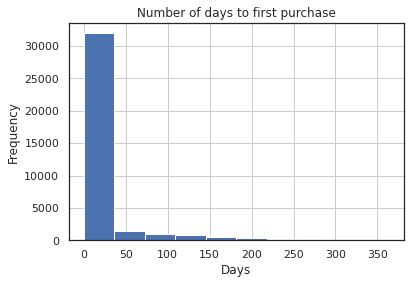

In [38]:
#Plotting number of days to first purchase
buyers["days_to_first_purchase"].hist()
plt.title('Number of days to first purchase')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()

In [39]:
#Calculating mean and median values 
meandays = buyers["days_to_first_purchase"].mean()
print(f'Mean {meandays}')
mediandays = buyers["days_to_first_purchase"].median()
print(f'Median {mediandays}')

Mean 16.73032692623624
Median 0.0


#### When do people start buying?

- The graph above shows that on average users take 16 days to place an order after visiting the site. The median value is 0 days.

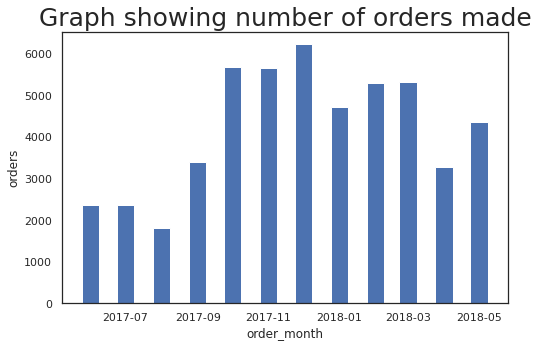

In [40]:
#Average orders made during cohort
orders = pd.merge(dforders,first_order, on='uid')
no_orders = orders.groupby(['order_month']).agg({'uid':'count'}).reset_index()
no_orders = no_orders.rename(columns = {'uid':'orders'})
#Plotting number of orders made in a given period
plt.figure(figsize=(8,5))
plt.bar(no_orders['order_month'],no_orders['orders'],width=15)    
plt.xlabel('order_month')
plt.ylabel('orders')
plt.title('Graph showing number of orders made',size=25)
plt.show()

In [41]:
meanorders = no_orders['orders'].mean()
print(f'Mean orders {meanorders}')
medianorders = no_orders['orders'].median()
print(f'Median orders {medianorders}')

Mean orders 4201.166666666667
Median orders 4533.5


#### How many orders do they make during a given period of time?

- There are 4 201 orders per month on average. The median number of orders in a month is 4 533 orders.

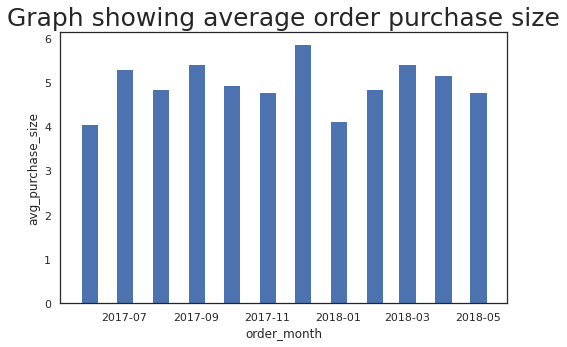

In [42]:
#Calculating monthly revenue
rev_orders = orders.groupby(['order_month']).agg({'revenue':'sum'}).reset_index()
#Merging revenue table with orders table
orders_ = pd.merge(rev_orders,no_orders, on='order_month')
#Calculating average purchase size
orders_['avg_purchase_size'] = orders_['revenue']/orders_['orders']
#Plottting average purchase size
plt.figure(figsize=(8,5))
plt.bar(orders_['order_month'],orders_['avg_purchase_size'],width=15)    
plt.xlabel('order_month')
plt.ylabel('avg_purchase_size')
plt.title('Graph showing average order purchase size',size=25)
plt.show()

In [43]:
meanordersize = orders_['avg_purchase_size'].mean()
print(f'Mean order size {meanordersize}')
medianordersize = orders_['avg_purchase_size'].median()
print(f'Median order size {medianordersize}')

Mean order size 4.956924587430198
Median order size 4.887709265477986


#### What is the average order purchase size?

- The average order purchase size is 4.95 and the median order purchase size is 4.88.

In [44]:
#Creating cohort sizes 
buyers['first_order_month'] = buyers['first_order_ts'].astype('datetime64[M]')
cohort_sizes = buyers.reset_index().groupby('first_order_month').aggregate(new_buyers=('uid','nunique'))
cohort_sizes.head()

,new_buyers
first_order_month,
2017-06-01,2023
2017-07-01,1923
2017-08-01,1370
2017-09-01,2581
2017-10-01,4340


In [45]:
#Merging orders with first sale table
cohorts = pd.merge(dforders, buyers, how='inner', on='uid')\
            .groupby(['first_order_month', 'order_month'])\
            .agg({'revenue': 'sum'}).reset_index()

cohorts.head()

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [46]:
#Merging tables to form report table
cohorts['age_month'] = ((cohorts['order_month'] - cohorts['first_order_month']) / np.timedelta64(1,'M')).round()
cohorts.columns = ['first_order_month', 'order_month', 'revenue', 'age_month']

In [47]:
#Adding new customers and calculating ltv
cohorts_report = pd.merge(cohort_sizes, cohorts, on = 'first_order_month')
cohorts_report['ltv'] = cohorts_report['revenue'] / cohorts_report['new_buyers']

In [48]:
cohorts_report

,first_order_month,new_buyers,order_month,revenue,age_month,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0.0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1.0,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2.0,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3.0,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4.0,1.022531
...,...,...,...,...,...,...
73,2018-03-01,3533,2018-04-01,1063.05,1.0,0.300892
74,2018-03-01,3533,2018-05-01,1114.87,2.0,0.315559
75,2018-04-01,2276,2018-04-01,10600.69,0.0,4.657597
76,2018-04-01,2276,2018-05-01,1209.92,1.0,0.531599


In [49]:
#Calculating LTV chart
cohorts_ltv = cohorts_report.pivot_table(
    index=cohorts_report['first_order_month'].dt.date, 
    columns='age_month', 
    values='ltv', 
    aggfunc='sum'
).cumsum(axis=1)

cohorts_ltv.round(2).fillna('')

age_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.5,7.66,7.78,7.92,8.08,8.23,8.39,
2017-08-01,5.28,5.75,6.21,6.6,7.09,7.38,7.59,7.99,8.28,8.47,,
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,,,
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11-01,5.15,5.55,5.75,6.08,6.23,6.28,6.4,,,,,
2017-12-01,4.74,5.0,5.92,6.99,7.3,7.64,,,,,,
2018-01-01,4.14,4.43,4.73,4.88,4.94,,,,,,,
2018-02-01,4.16,4.44,4.51,4.59,,,,,,,,


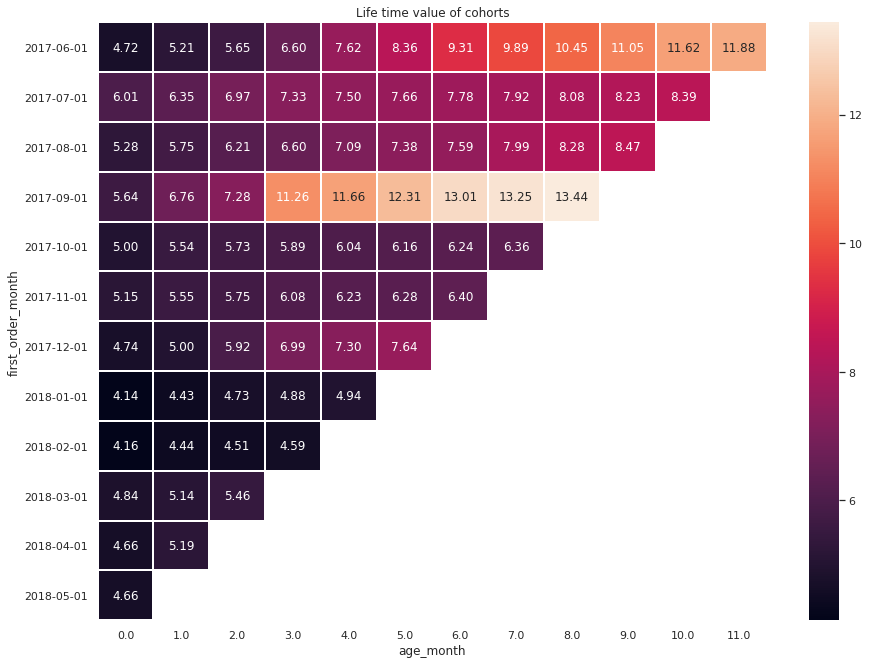

In [50]:
#Plotting lifetime value chart
plt.figure(figsize=(15,11))
plt.title('Life time value of cohorts')
sns.heatmap(
    cohorts_ltv,
    annot=True,
    fmt = '.2f',
    linewidths=1,
    linecolor='white'
)
plt.show()

In [51]:
#Calculating the lifetime value of first cohort
ltv_overall = cohorts_ltv.mean()
ltv_overall

age_month
0.0      4.916823
1.0      5.395666
2.0      5.821811
3.0      6.689763
4.0      7.298634
5.0      7.969053
6.0      8.387686
7.0      9.083583
8.0     10.062084
9.0      9.251340
10.0    10.004616
11.0    11.879234
dtype: float64

#### How much money do they bring? (LTV)

- The overall average life time value of each customer starts at 4.92 in age 0. The LTV from there gradually increases from 5.39 to 10 in age 10. It then decreases to 9.25 in age 9 then increases to 11.87 in age 11.

### Marketing<br>
<div id='market'></div>

In [52]:
#Calculating total costs
dfcosts['costs'].sum()

329131.62

#### How much money was spent overall?

- Overall 329 131.62 was spent.

In [53]:
#Calculating total costs per source
sourcecosts = dfcosts.groupby(['source_id','month']).agg({'costs':'sum'}).reset_index()
sourcecosts

,source_id,month,costs
0,1,2017-06-01,1125.61
1,1,2017-07-01,1072.88
2,1,2017-08-01,951.81
3,1,2017-09-01,1502.01
4,1,2017-10-01,2315.75
...,...,...,...
79,10,2018-01-01,614.35
80,10,2018-02-01,480.88
81,10,2018-03-01,526.41
82,10,2018-04-01,388.25


In [54]:
#Calculating average costs per source per month
meansourcecosts = sourcecosts.groupby('source_id').agg({'costs':'mean'}).reset_index()
meansourcecosts

,source_id,costs
0,1,1736.105833
1,2,3567.170000
2,3,11776.802500
3,4,5089.466667
4,5,4313.091667
5,9,459.790833
6,10,485.207500


In [55]:
#Calculating average costs per source per month
avgsourcepermonth = dfcosts.groupby(['source_id','month']).agg({'costs':'mean'}).reset_index()
avgsourcepermonth

,source_id,month,costs
0,1,2017-06-01,37.520333
1,1,2017-07-01,34.609032
2,1,2017-08-01,30.703548
3,1,2017-09-01,50.067000
4,1,2017-10-01,74.701613
...,...,...,...
79,10,2018-01-01,19.817742
80,10,2018-02-01,17.174286
81,10,2018-03-01,17.547000
82,10,2018-04-01,13.387931


##### How much money was spent per source?

On average the following was spent on the various sources: <br>
- source 1: 1 736 <br>
- source 2: 3 567 <br>
- source 3: 11 776 <br>
- source 4: 5 089 <br>
- source 5: 4 313 <br>
- source 9: 459 <br>
- source 10: 485

The average monthly costs per source per month overtime is plotted below

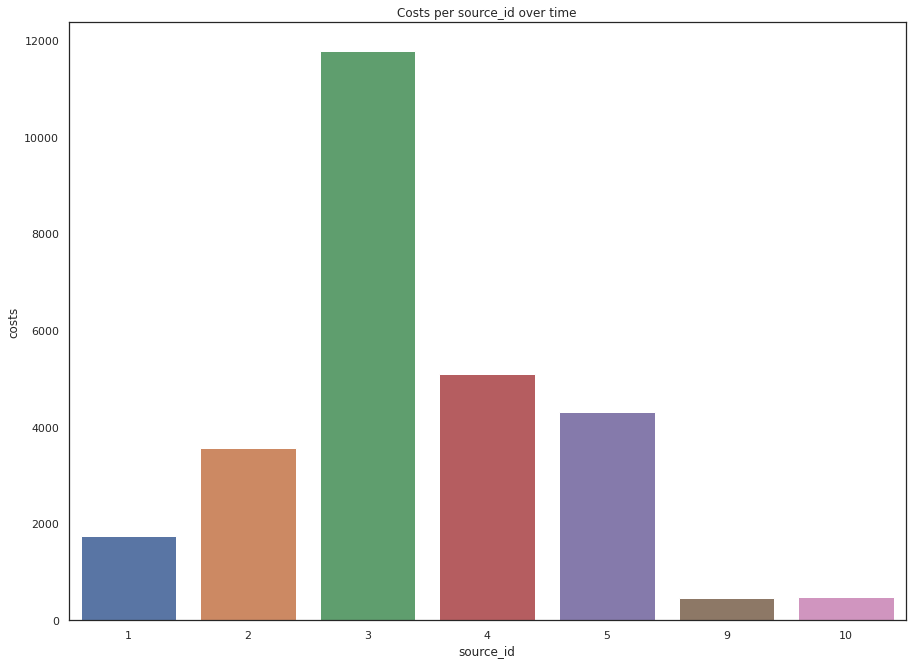

In [72]:
#plotting monthly source costs over time
plt.figure(figsize=(15,11))
plt.title('Costs per source_id over time')
sns.barplot(data=meansourcecosts,x='source_id',y='costs')
plt.show()

##### How much money was spent over time?

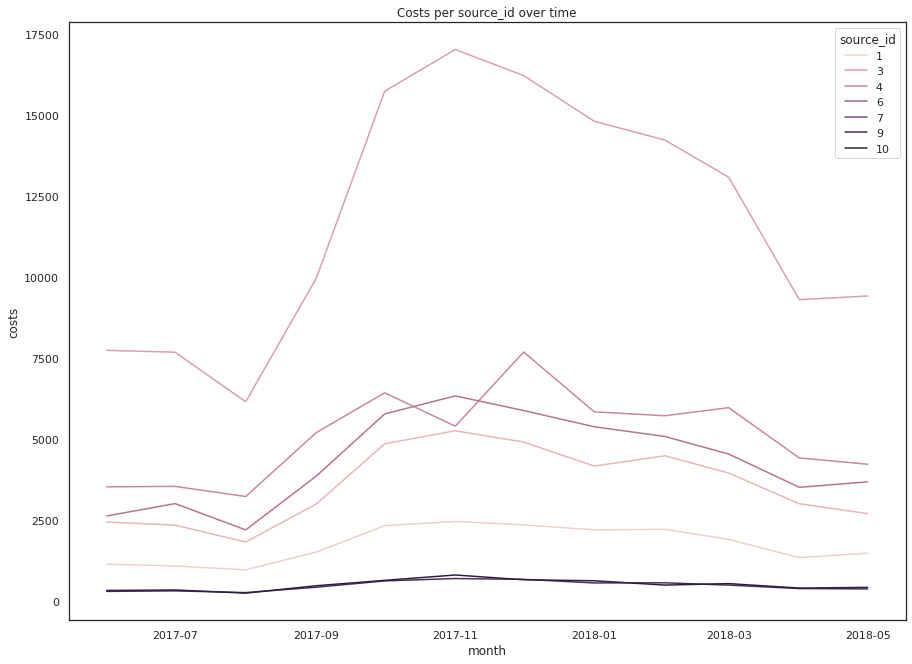

In [57]:
#plotting total source costs per source over time
plt.figure(figsize=(15,11))
plt.title('Costs per source_id over time')
sns.lineplot(data=sourcecosts,x=sourcecosts['month'].dt.date,y='costs',hue='source_id')
plt.show()

In [58]:
#Calculating the total cost for each source each month
monthlysourcecosts = pd.merge(sourcecosts,cohort_sizes,right_on='first_order_month',left_on='month')
monthlysourcecosts['cac'] = monthlysourcecosts['costs']/monthlysourcecosts['new_buyers']
monthlysourcecosts

,source_id,month,costs,new_buyers,cac
0,1,2017-06-01,1125.61,2023,0.556406
1,2,2017-06-01,2427.38,2023,1.199891
2,3,2017-06-01,7731.65,2023,3.821873
3,4,2017-06-01,3514.80,2023,1.737420
4,5,2017-06-01,2616.12,2023,1.293188
...,...,...,...,...,...
79,3,2018-05-01,9411.42,2988,3.149739
80,4,2018-05-01,4214.21,2988,1.410378
81,5,2018-05-01,3669.56,2988,1.228099
82,9,2018-05-01,362.17,2988,0.121208


In [59]:
#Calculating average CAC per source_id
avg_cac_per_source = monthlysourcecosts.groupby('source_id')['cac'].mean().reset_index()
avg_cac_per_source

,source_id,cac
0,1,0.576677
1,2,1.183436
2,3,3.906698
3,4,1.734494
4,5,1.432283
5,9,0.152793
6,10,0.160977


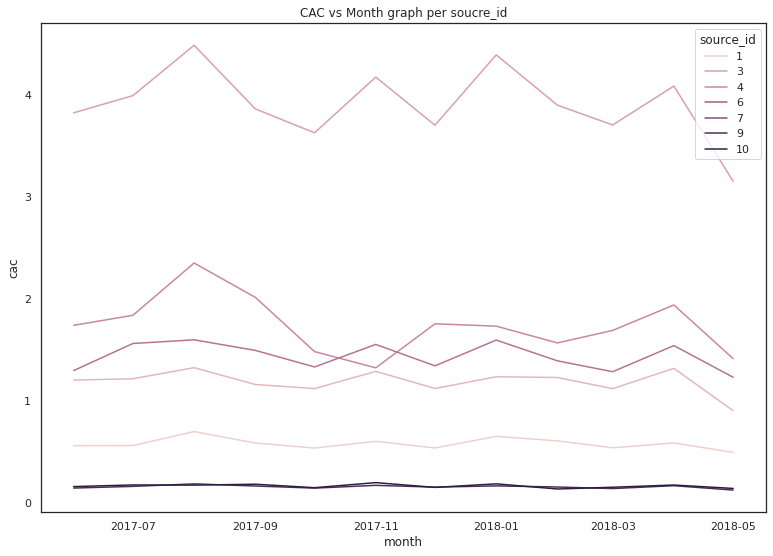

In [60]:
#Plotting CAC per source_id
plt.figure(figsize=(13,9))
sns.lineplot(y='cac',x='month',hue='source_id',data=monthlysourcecosts)
plt.title('CAC vs Month graph per soucre_id')
plt.show()

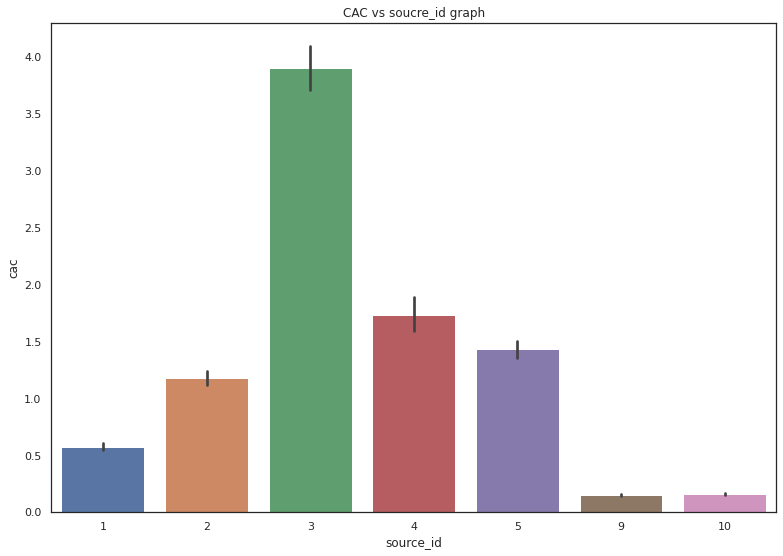

In [75]:
#Plotting a graph of CAC per month per source
plt.figure(figsize=(13,9))
sns.barplot(data=monthlysourcecosts,y='cac',x='source_id')
plt.title('CAC vs soucre_id graph')
plt.show()

#### How much did customer acquisition from each of the sources cost?

On average the following was spent on customer acquisition from each source: <br>
- source 1: 0.576677 <br>
- source 2: 1.183436 <br>
- source 3: 3.906698 <br>
- source 4: 1.734494 <br>
- source 5: 1.432283 <br>
- source 9: 0.152793 <br>
- source 10: 0.160977

In [61]:
#Calculating cohorts monthly costs 
cohortsmonthcost = dfcosts.groupby(['month']).agg({'costs':'sum'}).reset_index()
cohortsmonthcost

,month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


In [62]:
#Adding costs table to report table
report_ = pd.merge(cohorts_report,cohortsmonthcost,how='inner',left_on='order_month',right_on='month')
#Calculating CAC
report_['cac'] = report_['costs']/report_['new_buyers']
report_#.head()

,first_order_month,new_buyers,order_month,revenue,age_month,ltv,month,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,0.0,4.724414,2017-06-01,18015.00,8.905091
1,2017-06-01,2023,2017-07-01,981.82,1.0,0.485329,2017-07-01,18240.59,9.016604
2,2017-07-01,1923,2017-07-01,11557.65,0.0,6.010218,2017-07-01,18240.59,9.485486
3,2017-06-01,2023,2017-08-01,885.34,2.0,0.437637,2017-08-01,14790.54,7.311191
4,2017-07-01,1923,2017-08-01,644.61,1.0,0.335211,2017-08-01,14790.54,7.691388
...,...,...,...,...,...,...,...,...,...
73,2018-01-01,3373,2018-05-01,211.48,4.0,0.062698,2018-05-01,22224.27,6.588873
74,2018-02-01,3651,2018-05-01,270.70,3.0,0.074144,2018-05-01,22224.27,6.087173
75,2018-03-01,3533,2018-05-01,1114.87,2.0,0.315559,2018-05-01,22224.27,6.290481
76,2018-04-01,2276,2018-05-01,1209.92,1.0,0.531599,2018-05-01,22224.27,9.764618


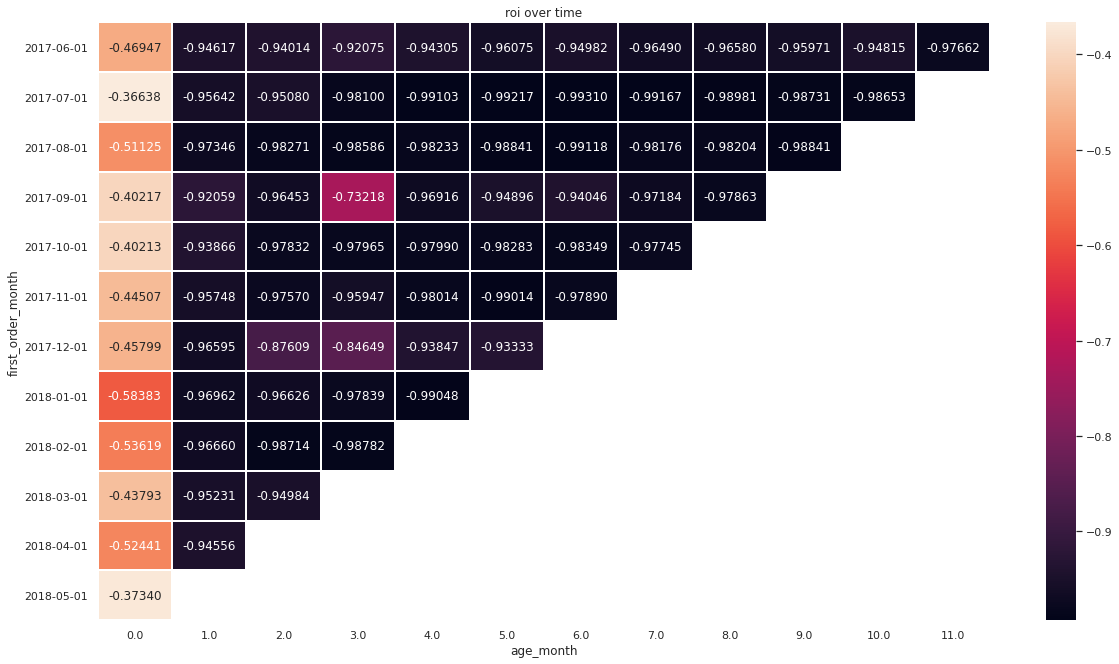

In [79]:
#Calculating the romi
report_['roi'] = (report_['revenue']-report_['costs'])/report_['costs']
romichart = report_.pivot_table(
    index=report_['first_order_month'].dt.date,columns='age_month',values='roi',aggfunc='sum'
)
plt.figure(figsize=(20,11))
plt.title('roi over time')
sns.heatmap(
    romichart,
    annot=True,
    fmt = '.5f',
    linewidths=1,
    linecolor='white'
)
plt.show()

#### How worthwhile were the investment? (ROI)

- The ROI for the first cohort over their lifetime were as follows: <br>

In [64]:
#Mean
romichart.mean(axis=0) 

age_month
0.0     0.540816
1.0     0.046108
2.0     0.042848
3.0     0.069821
4.0     0.028180
5.0     0.029060
6.0     0.027176
7.0     0.022477
8.0     0.020931
9.0     0.021525
10.0    0.032659
11.0    0.023381
dtype: float64

### Device Plots 
<div id='device'></div>

In [65]:
#Reducing visits dataframe 
shortvisits = dfvisits[['device','uid','source_id']]
orders['first_order_month'] = orders['first_order_ts'].astype('datetime64[M]')
#
redorders = pd.merge(shortvisits,orders,on='uid')
#
redorders = redorders.groupby(['order_month','device','source_id','first_order_month']).agg({'uid':'nunique','revenue':'mean'}).reset_index()
redorders = pd.merge(redorders,dfcosts[['source_id','costs']],on='source_id')
device_report = pd.merge(redorders,cohort_sizes,on='first_order_month')
device_report['ltv'] = device_report['revenue']/device_report['new_buyers']
device_report['cac'] = device_report['costs']/device_report['new_buyers']


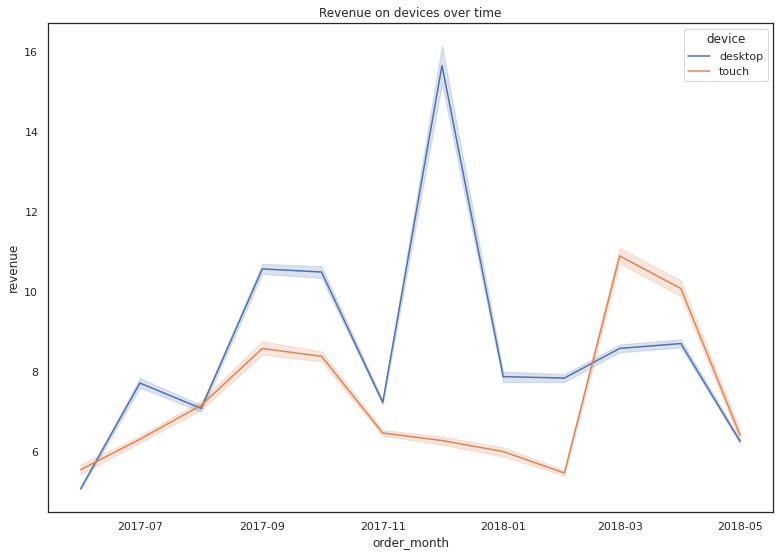

In [66]:
#Plotting revenue vs devices
plt.figure(figsize=(13,9))
sns.lineplot(y='revenue',x='order_month',hue='device',data=device_report)
plt.title('Revenue on devices over time')
plt.show()

Comment:

- From the diagram above it is observed that on average desktop devices generated more revenue than the touch screen devices then touch devices generate more revenue towards the end of the year. 

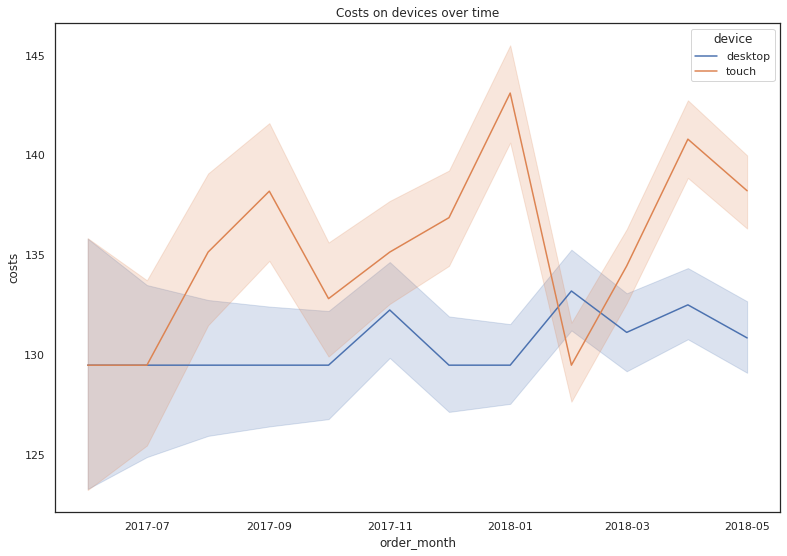

In [67]:
#devices vs revenue
plt.figure(figsize=(13,9))
sns.lineplot(y='costs',x='order_month',hue='device',data=device_report)
plt.title('Costs on devices over time')
plt.show()

Comment:

- From the diagram above it is sobserved that the costs of touch devices are mostly higher than the costs of desktop devices.

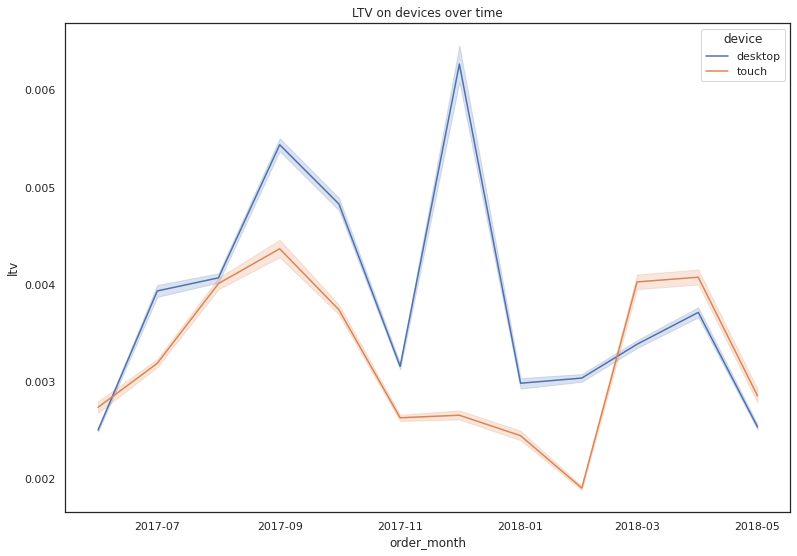

In [68]:
plt.figure(figsize=(13,9))
sns.lineplot(y='ltv',x='order_month',hue='device',data=device_report)
plt.title('LTV on devices over time')
plt.show()

Comment:

- From the diagram above it is observed that the average ltv value of desktop devices is mostly higher than touch devices overtime then the touch devices over take the desktops towards the end of the year.

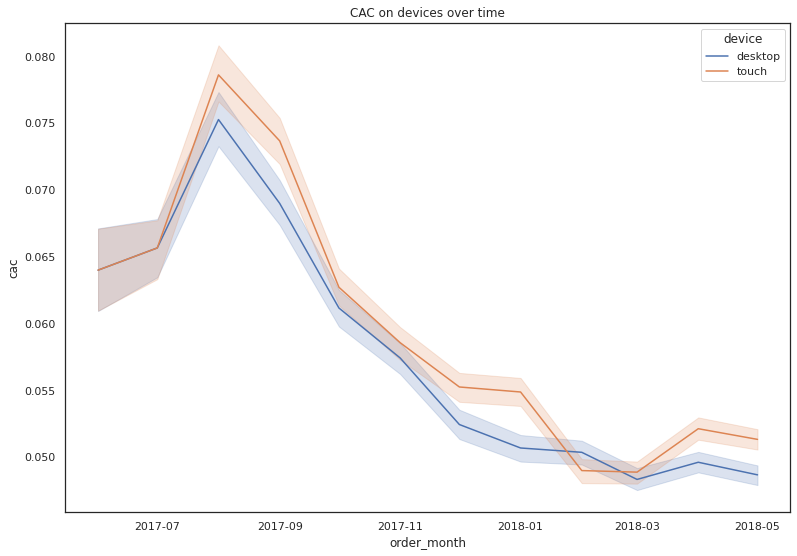

In [69]:
#devices vs costs
plt.figure(figsize=(13,9))
sns.lineplot(y='cac',x='order_month',hue='device',data=device_report)
plt.title('CAC on devices over time')
plt.show()

Comment:

- From the above diagram it is observed that the cost of acquisition for both decreases overtime however the cac of touch devices is mostly higher than the cac of the desktop devices overtime.

## Conlcusion <br>
<div id='conclusion'></div>

From the above analysis the data was firstly uploaded. There after the data was scanned to get futher information. It was found that the column names were in the incorrect format and the date columns were in string data type. The column names were changed to snake case and the column data types for the date columns were changed to date time data type. 

Looking at the sales section it is evident that new users increasingly starting ordering from October peaking in December. It can be implied that most visitors purchase in this period due to Christmas.The average order size is drastically high in October this could mean that there was a promotion on objects and people perhaps started to buy Christmas presents early on a trending item. The lifetime value of the first cohort performs best best through out the year, than the other cohorts. This is evident on the larger return on marketing investment values of the first cohort. It is also seen that the desktop device is the dominant device that the customers use.

It is advised that the marketing team firstly reduce spending on touch device marketing and rather invest more on desktop device users as most of the revenue is generated by these users. The marketing team should also focus on improving the lifetime value of users that place orders after the first month. They should also focus on retaining these customers to increase their lifetime value and perhaps work on effective strategies to improve the return on marketing investment on later cohorts.

Source_id 4 has the highest customer acquisition cost and is the second highest source cost. The marketing department can perhaps reduce this cost and rather invest in the cheaper sources that are tied to desktop device users to increase the romi.It is also more likely that the cheaper customers to acquire are the customers that would genuily like the product and is most like to order more frequently where as customers with higher acquisition costs are usually customers that are slighlty outside the target market of the product being sold therefore costing more to acquire and keep them.